**Remarks**

We will learn how to predict using iris-dataset. Let's started

In [2]:
# Preparation dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d uciml/iris

  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 3.21MB/s]


In [3]:
!unzip "iris.zip"

Archive:  iris.zip
  inflating: Iris.csv                
  inflating: database.sqlite         


In [1]:
# Read the dataset
import pandas as pd
data = pd.read_csv("Iris.csv")
data = data.drop('Id', axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
print("Show data minimum and maximum Sepal Length:", (data.SepalLengthCm.min(), data.SepalLengthCm.max()))

Show data minimum and maximum Sepal Length: (4.3, 7.9)


In [3]:
print("Show data minimum and maximum Sepal Width:", (data.SepalWidthCm.min(), data.SepalWidthCm.max()))

Show data minimum and maximum Sepal Width: (2.0, 4.4)


In [4]:
print("Show data minimum and maximum Petal Length:", (data.PetalLengthCm.min(), data.PetalLengthCm.max()))

Show data minimum and maximum Petal Length: (1.0, 6.9)


In [5]:
print("Show data minimum and maximum Petal Width:", (data.PetalWidthCm.min(), data.PetalWidthCm.max()))

Show data minimum and maximum Petal Width: (0.1, 2.5)


In [6]:
print("Shape of dataset", data.shape)

Shape of dataset (150, 5)


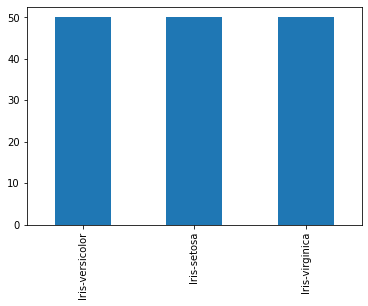

In [7]:
# Plotting species data
import matplotlib.pyplot as plt
%matplotlib inline

data.Species.value_counts().plot(kind='bar');

In [10]:
# From picture above, we know dataset that have same proportion
# Splitting dataset
X = data.drop(['Species'], axis=1)
y = data.Species

# ENCODING DATA
y = y.apply(lambda x: 0 if x=='Iris-setosa' else(1 if x=='Iris-versicolor' else 2))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

accuracy = 0.978, precision = 0.980, recall = 0.978, f1 = 0.978

Below is classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      0.93      0.97        15
           2       0.89      1.00      0.94         8

    accuracy                           0.98        45
   macro avg       0.96      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45

Below is confusion matrix:


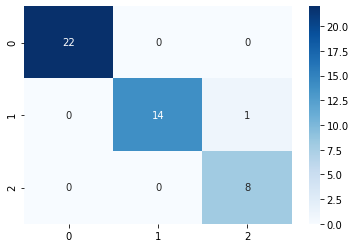

In [38]:
# Preparation model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score

clf_base = LogisticRegression(C=30, class_weight='balanced', solver='newton-cg', 
                              multi_class='multinomial', n_jobs=-1, random_state=40)
grid = { }
clf = GridSearchCV(clf_base, grid, cv=3, n_jobs=-1, scoring='f1_macro')
# clf = LogisticRegression(C=30, class_weight='balanced', dual=False,
#                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
#                    max_iter=100, multi_class='multinomial', n_jobs=-1,
#                    penalty='l2', random_state=40, solver='newton-cg',
#                    tol=0.0001, verbose=0, warm_start=False)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Calculate metrics
precision = precision_score(y_test, y_pred, pos_label=None, average='weighted')
recall = recall_score(y_test, y_pred, pos_label=None, average='weighted')
f1 = f1_score(y_test, y_pred, pos_label=None, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\n" % (accuracy, precision, recall, f1))
print("Below is classification report:")
print(classification_report(y_test, y_pred))

import seaborn as sns
print("Below is confusion matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues');

In [39]:
# Saving model
Pkl_Filename = "model_iris.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(clf, file)

In [ ]:
# Let's Deploy

In [20]:
data = {'SepalLengthCm': 3,
        'SepalWidthCm': 2,
        'PetalLengthCm': 2,
        'PetalWidthCm': 1}
features = pd.DataFrame(data, index=[0])
features

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,3,2,2,1


In [42]:
with open(Pkl_Filename, 'rb') as file:  
    pick = pickle.load(file)

prediction = pick.predict(features)
prediction

array([0])

In [46]:
result = ['Iris-setosa' if prediction == 0 else ('Iris-versicolor' if prediction == 1 else 'Iris-virginica')]
result[0]

'Iris-setosa'